### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [17]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [4]:
data.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')

In [5]:
#Source: https://github.com/toby-gardner-ai/uc-berkeley-aiml-course/blob/main/notebooks/Mod4_Data_Analytics.ipynb
def summary_stats(df) -> pd.DataFrame:

    # Create base frame
    stats = pd.DataFrame(index=df.columns)

    stats["dtype"] = df.dtypes


    stats["sample_val"] = [df[col].dropna().sample(1).iloc[0]
                            if df[col].notna().any() else np.nan
                            for col in df.columns]

    stats["vals"] = df.count()
    stats["miss_pct"] = (df.isna().sum() / len(df) * 100).round(1)
    stats["unique"] = df.nunique()

    # Initiate Descriptive Stats
    for col in ["mean", "mode", "min", "max", "std", "skew", "kurtosis"]:
        stats[col] = np.nan

    # Compute stats for numeric columns
    num_cols = df.select_dtypes(include="number").columns

    for col in num_cols:
        s = df[col].dropna()
        if not s.empty:
            stats.at[col, "mean"] = s.mean()
            stats.at[col, "min"] = s.min()
            stats.at[col, "max"] = s.max()
            stats.at[col, "std"] = s.std()
            #stats.at[col, "skew"] = s.skew().round(1)
            #stats.at[col, "kurtosis"] = s.kurtosis().round(1)
            mode_vals = s.mode()
            stats.at[col, "mode"] = mode_vals.iloc[0] if not mode_vals.empty else np.nan

    # Rounding preferences for numeric stats (change this to suit dataset)
    round_cols = ["mean", "mode", "min", "max", "std"]
    stats[round_cols] = stats[round_cols].round(2)

    return stats

In [6]:
# Analyze the raw data to understand missing values and sample data observed in it
summary_stats(data)

,dtype,sample_val,vals,miss_pct,unique,mean,mode,min,max,std,skew,kurtosis
destination,object,No Urgent Place,12684,0.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
passanger,object,Alone,12684,0.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weather,object,Sunny,12684,0.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
temperature,int64,55,12684,0.0,3,63.30,80.0,30.0,80.0,19.15,NaN,NaN
time,object,10AM,12684,0.0,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
coupon,object,Bar,12684,0.0,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
expiration,object,2h,12684,0.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,object,Female,12684,0.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,object,31,12684,0.0,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
maritalStatus,object,Divorced,12684,0.0,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
data['coupon'].value_counts()

coupon
Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: count, dtype: int64

In [8]:
data['expiration'].value_counts()

expiration
1d    7091
2h    5593
Name: count, dtype: int64

In [9]:
data['car'].value_counts()

car
Scooter and motorcycle                      22
Mazda5                                      22
do not drive                                22
crossover                                   21
Car that is too old to install Onstar :D    21
Name: count, dtype: int64

In [10]:
data['Bar'].value_counts()

Bar
never    5197
less1    3482
1~3      2473
4~8      1076
gt8       349
Name: count, dtype: int64

In [11]:
data['CoffeeHouse'].value_counts()

CoffeeHouse
less1    3385
1~3      3225
never    2962
4~8      1784
gt8      1111
Name: count, dtype: int64

In [13]:
data['CarryAway'].value_counts()

CarryAway
1~3      4672
4~8      4258
less1    1856
gt8      1594
never     153
Name: count, dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

Feature Engineering

3.a.Data is missing on car column for 99% rows. Hence feature 'Car' is dropped.

3.b. On missing data on Bar/CoffeeHouse/CarryAway and Restaurants, an assumption is made to assume missing means customer has never gone

3.c. time is converted into time series to chronologically view when coupons are accepted at highest rate

In [18]:
data=data.drop(columns=['car'])

In [19]:
data['Bar']=data['Bar'].fillna('never')
data['CoffeeHouse']=data['CoffeeHouse'].fillna('never')
data['CarryAway']=data['CarryAway'].fillna('never')
data['RestaurantLessThan20']=data['RestaurantLessThan20'].fillna('never')
data['Restaurant20To50']=data['Restaurant20To50'].fillna('never')

In [20]:
data['time']=pd.to_datetime(data['time'], format='%I%p').dt.time

In [21]:
# Checking after data cleaning 
summary_stats(data)

,dtype,sample_val,vals,miss_pct,unique,mean,mode,min,max,std,skew,kurtosis
destination,object,Work,12684,0.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
passanger,object,Alone,12684,0.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weather,object,Sunny,12684,0.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
temperature,int64,80,12684,0.0,3,63.30,80.0,30.0,80.0,19.15,NaN,NaN
time,object,10:00:00,12684,0.0,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
coupon,object,Carry out & Take away,12684,0.0,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
expiration,object,1d,12684,0.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,object,Female,12684,0.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,object,41,12684,0.0,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
maritalStatus,object,Single,12684,0.0,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN


4. What proportion of the total observations chose to accept the coupon?



In [29]:
data[data['Y']==1]['Y'].sum()/data['Y'].count()

0.5684326710816777

5. Use a bar plot to visualize the `coupon` column.

In [29]:
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

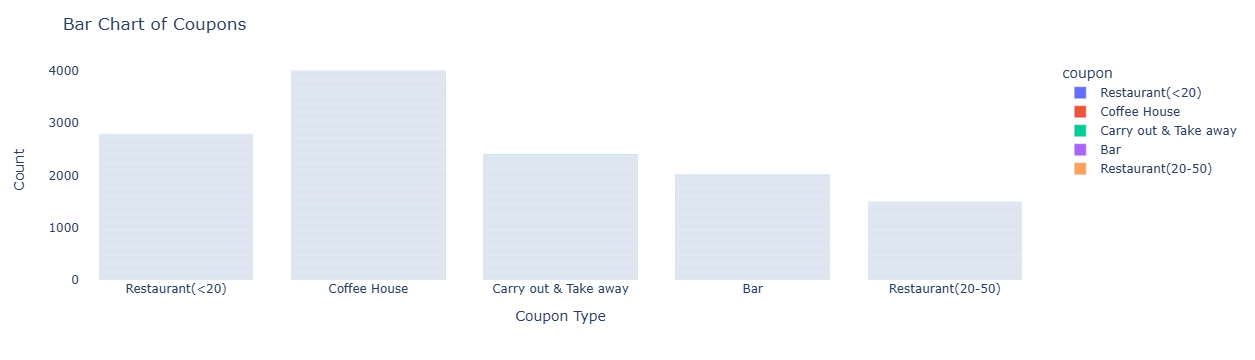

In [30]:
fig=px.bar(data, x='coupon', color='coupon')
fig.update_layout(
    plot_bgcolor='white',
    paper_bgcolor='white',
    title="Bar Chart of Coupons",
    xaxis_title='Coupon Type',
    yaxis_title='Count'
)
fig.show()
fig.write_html('visuals/m5_1_bar_coupon.html')

6. Use a histogram to visualize the temperature column.

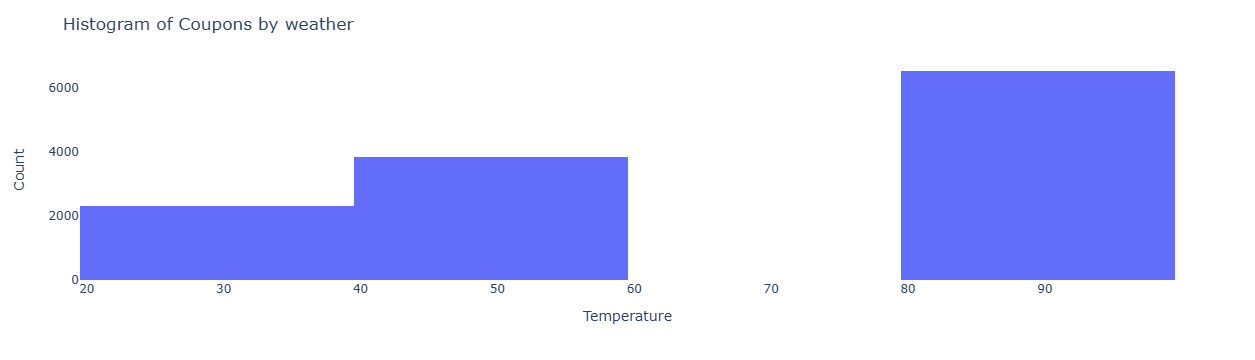

In [31]:
fig=px.histogram(data, x='temperature')
fig.update_layout(
    plot_bgcolor='white',
    paper_bgcolor='white',
    title="Histogram of Coupons by weather",
    xaxis_title='Temperature',
    yaxis_title='Count'
)
fig.show()
fig.write_html('visuals/m5_2_hist_weather.html')

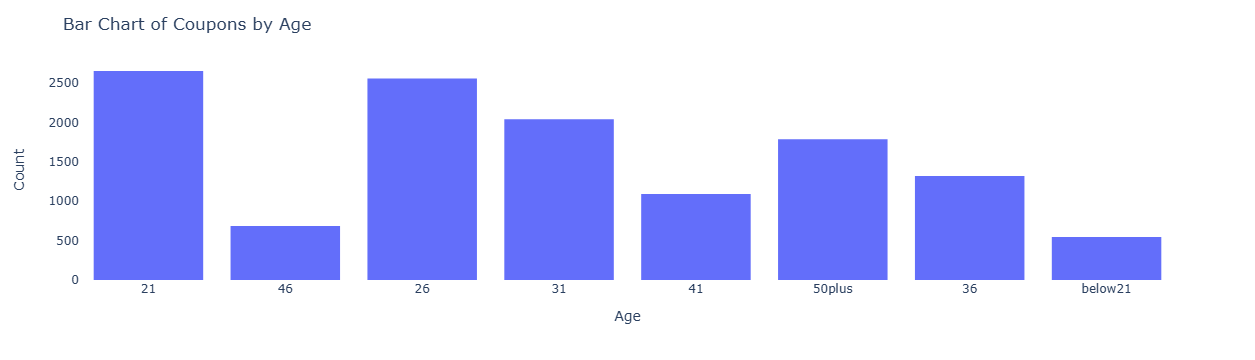

In [32]:
fig=px.histogram(data, x='age')
fig.update_layout(
    plot_bgcolor='white',
    paper_bgcolor='white',
    title="Bar Chart of Coupons by Age",
    xaxis_title='Age',
    yaxis_title='Count'
)
fig.show()
fig.write_html('visuals/m5_3_bar_age.html')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [37]:
data1=data.query("coupon=='Bar'").copy()

2. What proportion of bar coupons were accepted?


In [34]:
data1[data1['Y']==1]['Y'].sum()/data1['Y'].count()

0.41001487357461575

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [35]:
acceptance_rate_by_bar = data1.groupby('Bar')['Y'].mean()
acceptance_rate_by_bar

Bar
1~3      0.647355
4~8      0.780000
gt8      0.734694
less1    0.443860
never    0.192714
Name: Y, dtype: float64

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [38]:
data1['criteria1']=(data1['Bar'].isin(['never','less1']) & ~data1['age'].isin(['below21','21','26']))

In [39]:
acceptance_rate_by_criteria1 = data1.groupby('criteria1')['Y'].mean()
acceptance_rate_by_criteria1

criteria1
False    0.522609
True     0.260669
Name: Y, dtype: float64

In [40]:
data1.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,criteria1
9,No Urgent Place,Kid(s),Sunny,80,10:00:00,Bar,1d,Female,21,Unmarried partner,...,never,4~8,1~3,1,1,0,0,1,0,False
13,Home,Alone,Sunny,55,18:00:00,Bar,1d,Female,21,Unmarried partner,...,never,4~8,1~3,1,0,0,1,0,1,False
17,Work,Alone,Sunny,55,07:00:00,Bar,1d,Female,21,Unmarried partner,...,never,4~8,1~3,1,1,1,0,1,0,False
24,No Urgent Place,Friend(s),Sunny,80,10:00:00,Bar,1d,Male,21,Single,...,4~8,4~8,less1,1,0,0,0,1,1,False
35,Home,Alone,Sunny,55,18:00:00,Bar,1d,Male,21,Single,...,4~8,4~8,less1,1,0,0,1,0,1,False


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [41]:
data1['criteria2']=(
    (~data1['Bar'].isin(['never','less1'])) 
     & 
     (data1['passanger'].isin(['Alone','Friend(s)','Partner'])) 
     & 
     (~data1['occupation'].isin(['farming','fishing','forestry']))
    )

In [42]:
acceptance_rate_by_criteria2 = data1.groupby('criteria2')['Y'].mean()
acceptance_rate_by_criteria2

criteria2
False    0.296044
True     0.713249
Name: Y, dtype: float64

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [43]:
data1.query("(Bar in ['1~3','4~8','gt8']) & (passanger!='Kid(s)') & (maritalStatus!='Widowed')")['Y'].mean()

0.7132486388384754

In [44]:
data1.query("(Bar in ['1~3','4~8','gt8']) & (age in ['below21','21','26'])")['Y'].mean()

0.7217391304347827

In [45]:
data1.query("(income in ['Less than $12500','$12500 - $24999','$25000 - $37499','$37500 - $49999']) & (RestaurantLessThan20 not in ['never','less1','1~3'])")['Y'].mean()

0.45348837209302323

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

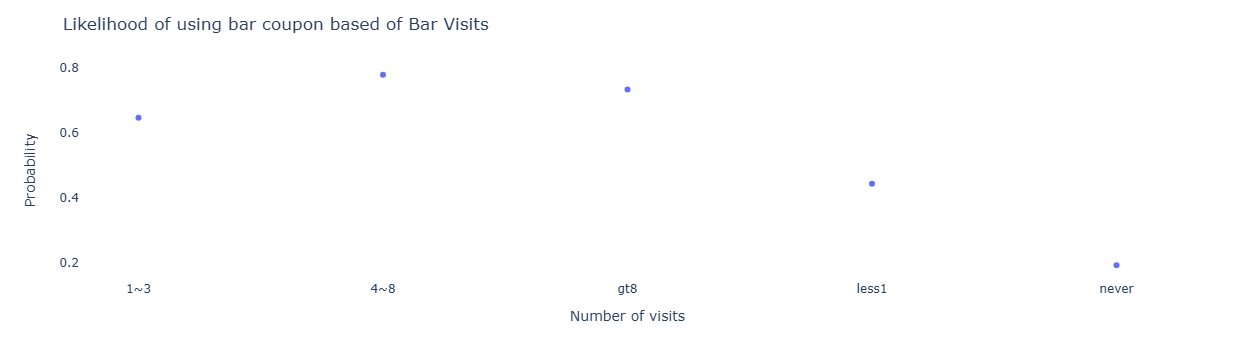

In [49]:
fig=px.scatter(data1.groupby('Bar')['Y'].mean(),y='Y')
fig.update_layout(
    plot_bgcolor='white',
    paper_bgcolor='white',
    title="Likelihood of using bar coupon based of Bar Visits",
    xaxis_title='Number of visits',
    yaxis_title='Probability'
)
fig.show()
fig.write_html('visuals/m5_4_prob_visits.html')

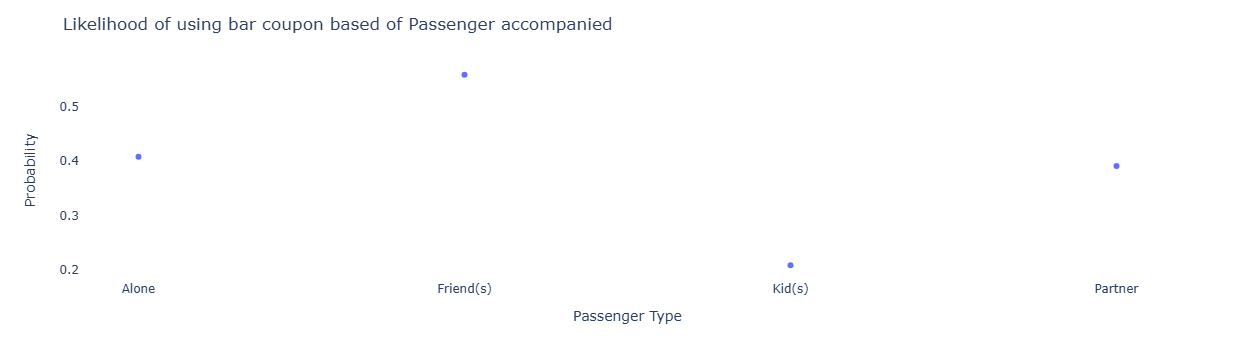

In [50]:
fig=px.scatter(data1.groupby('passanger')['Y'].mean(),y='Y')
fig.update_layout(
    plot_bgcolor='white',
    paper_bgcolor='white',
    title="Likelihood of using bar coupon based of Passenger accompanied",
    xaxis_title='Passenger Type',
    yaxis_title='Probability'
)
fig.show()
fig.write_html('visuals/m5_5_prob_passenger.html')

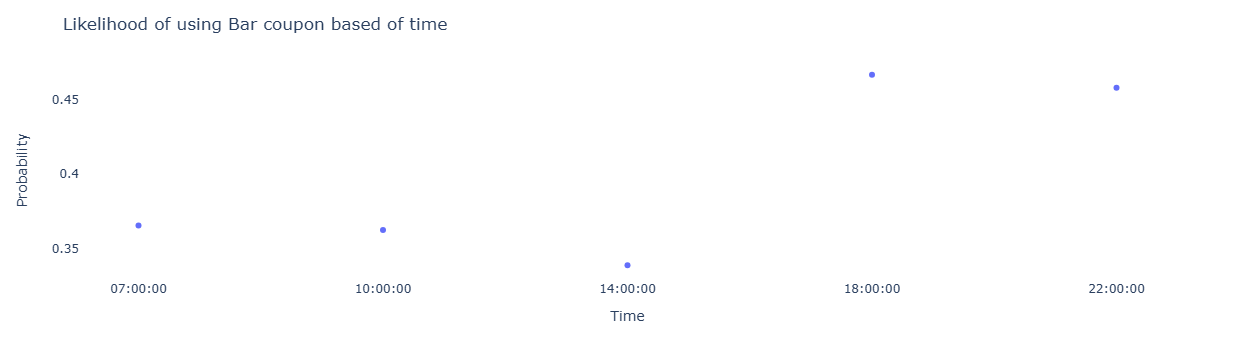

In [51]:
fig=px.scatter(data1.groupby('time')['Y'].mean(),y='Y')
fig.update_layout(
    plot_bgcolor='white',
    paper_bgcolor='white',
    title="Likelihood of using Bar coupon based of time",
    xaxis_title='Time',
    yaxis_title='Probability'
)
fig.show()
fig.write_html('visuals/m5_6_prob_time.html')

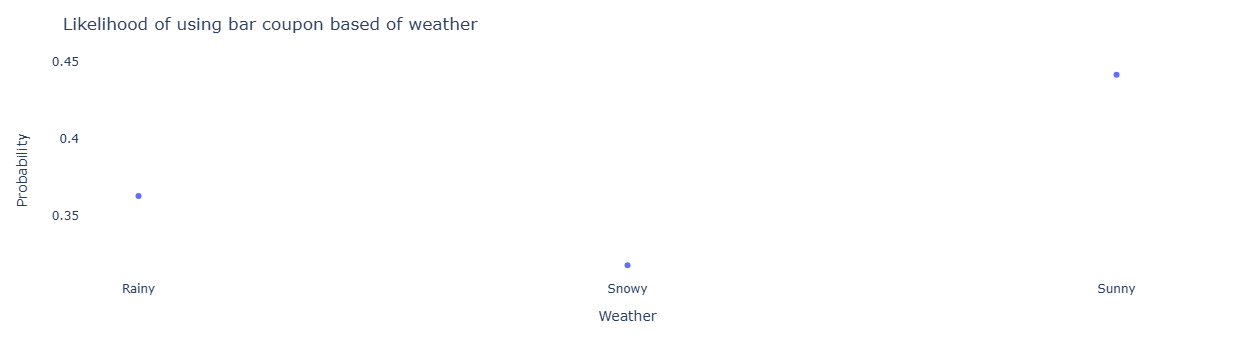

In [53]:
fig=px.scatter(data1.groupby('weather')['Y'].mean(),y='Y')
fig.update_layout(
    plot_bgcolor='white',
    paper_bgcolor='white',
    title="Likelihood of using bar coupon based of weather",
    xaxis_title='Weather',
    yaxis_title='Probability'
)
fig.show()
fig.write_html('visuals/m5_7_prob_weather.html')

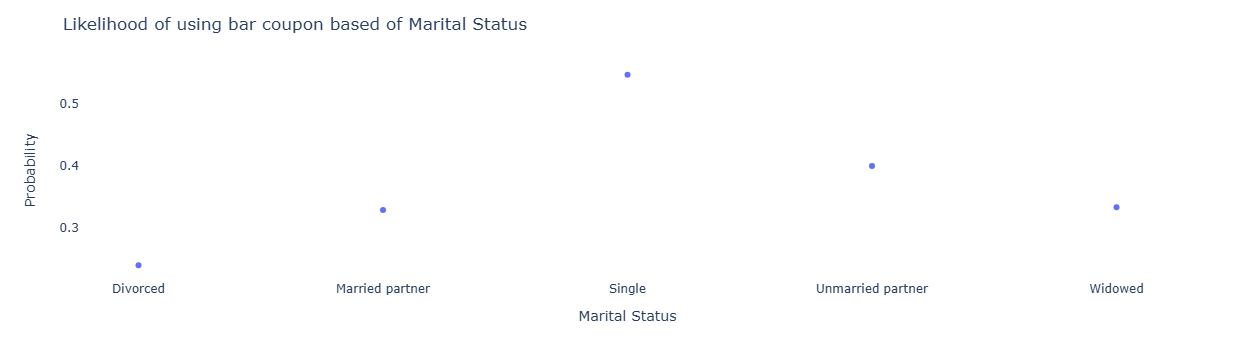

In [54]:
fig=px.scatter(data1.groupby('maritalStatus')['Y'].mean(),y='Y')
fig.update_layout(
    plot_bgcolor='white',
    paper_bgcolor='white',
    title="Likelihood of using bar coupon based of Marital Status",
    xaxis_title='Marital Status',
    yaxis_title='Probability'
)
fig.show()
fig.write_html('visuals/m5_8_prob_marital_status.html')

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [ ]:
#CoffeeHouse

In [55]:
data['CoffeeHouse'].value_counts()

CoffeeHouse
less1    3385
1~3      3225
never    3179
4~8      1784
gt8      1111
Name: count, dtype: int64

In [56]:
data['coupon'].value_counts()

coupon
Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: count, dtype: int64

In [57]:
data2=data.query("coupon=='Coffee House'")

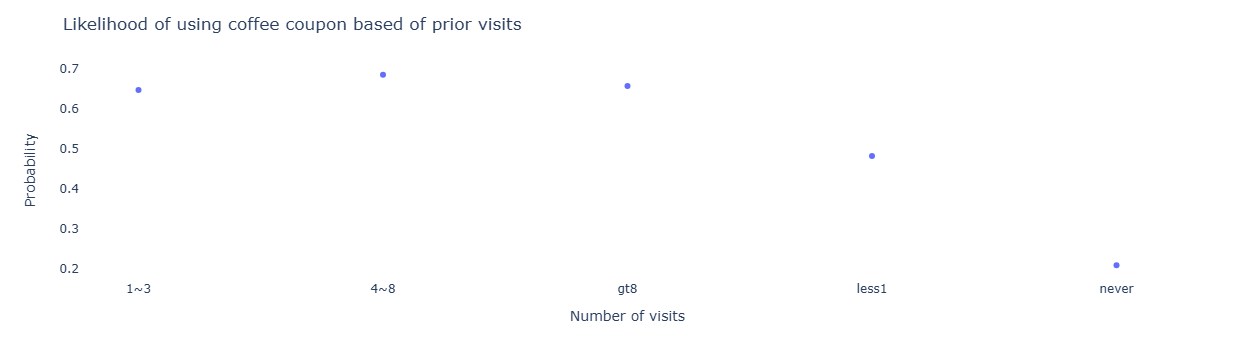

In [58]:
fig=px.scatter(data2.groupby('CoffeeHouse')['Y'].mean(),y='Y')
fig.update_layout(
    plot_bgcolor='white',
    paper_bgcolor='white',
    title="Likelihood of using coffee coupon based of prior visits",
    xaxis_title='Number of visits',
    yaxis_title='Probability'
)
fig.show()
fig.write_html('visuals/m5_9_c_prob_visits.html')

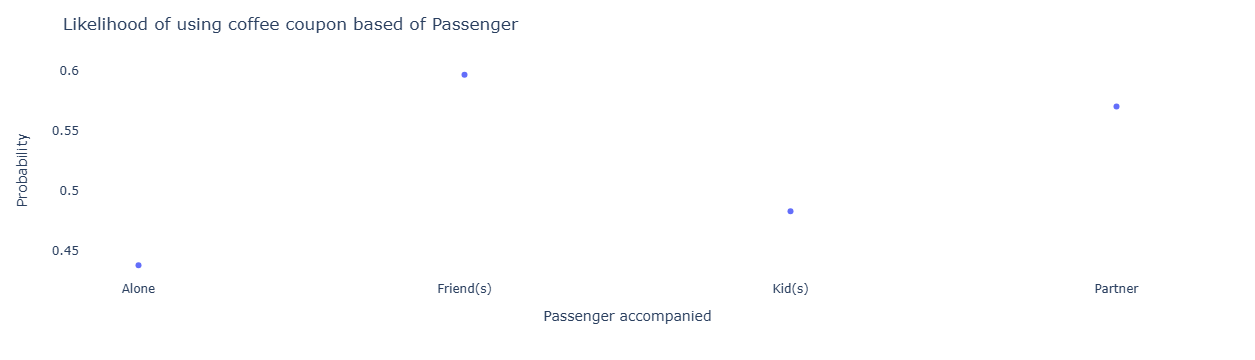

In [60]:
fig=px.scatter(data2.groupby('passanger')['Y'].mean(),y='Y')
fig.update_layout(
    plot_bgcolor='white',
    paper_bgcolor='white',
    title="Likelihood of using coffee coupon based of Passenger",
    xaxis_title='Passenger accompanied',
    yaxis_title='Probability'
)
fig.show()
fig.write_html('visuals/m5_10_c_prob_passenger.html')

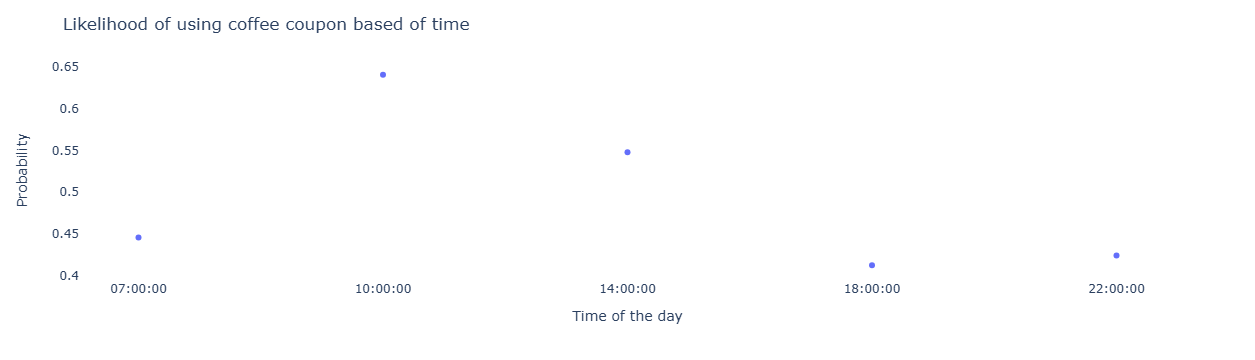

In [61]:
fig=px.scatter(data2.groupby('time')['Y'].mean(),y='Y')
fig.update_layout(
    plot_bgcolor='white',
    paper_bgcolor='white',
    title="Likelihood of using coffee coupon based of time",
    xaxis_title='Time of the day',
    yaxis_title='Probability'
)
fig.show()
fig.write_html('visuals/m5_11_c_prob_time_of_the_day.html')

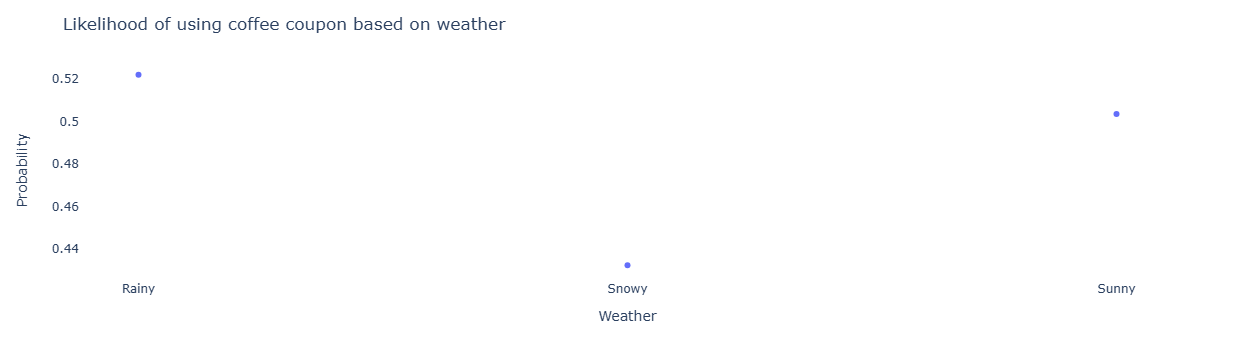

In [62]:
fig=px.scatter(data2.groupby('weather')['Y'].mean(),y='Y')
fig.update_layout(
    plot_bgcolor='white',
    paper_bgcolor='white',
    title="Likelihood of using coffee coupon based on weather",
    xaxis_title='Weather',
    yaxis_title='Probability'
)
fig.show()
fig.write_html('visuals/m5_12_c_prob_weather.html')

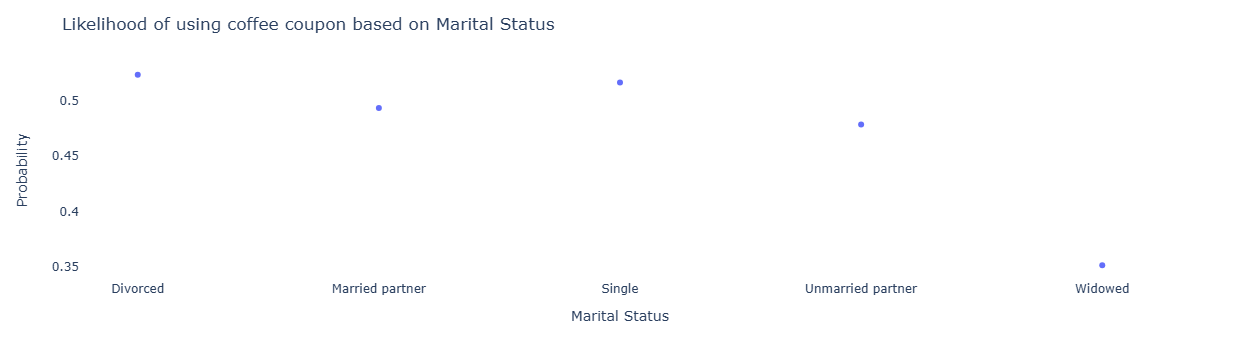

In [63]:
fig=px.scatter(data2.groupby('maritalStatus')['Y'].mean(),y='Y')
fig.update_layout(
    plot_bgcolor='white',
    paper_bgcolor='white',
    title="Likelihood of using coffee coupon based on Marital Status",
    xaxis_title='Marital Status',
    yaxis_title='Probability'
)
fig.show()
fig.write_html('visuals/m5_13_c_prob_marital_status.html')

In [ ]:
#CarryAway

In [64]:
data['CarryAway'].value_counts()

CarryAway
1~3      4672
4~8      4258
less1    1856
gt8      1594
never     304
Name: count, dtype: int64

In [65]:
data['coupon'].value_counts()

coupon
Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: count, dtype: int64

In [66]:
data3=data.query("coupon=='Carry out & Take away'")

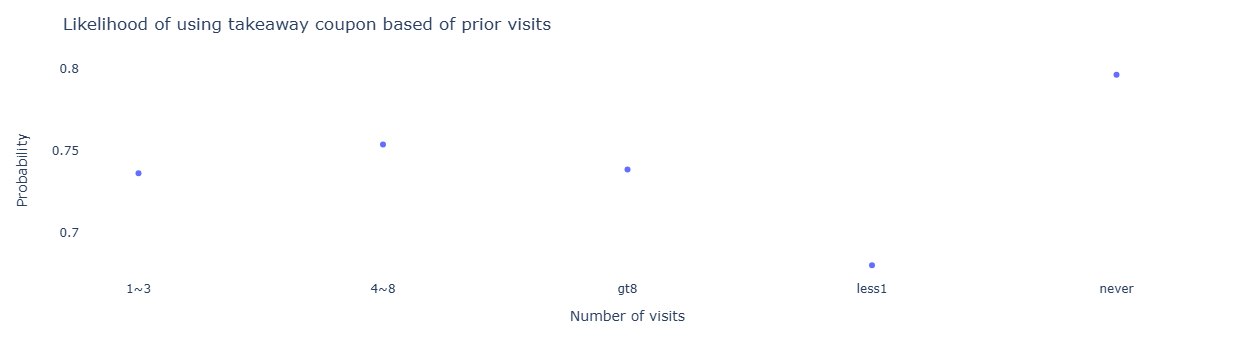

In [72]:
fig=px.scatter(data3.groupby('CarryAway')['Y'].mean(),y='Y')
fig.update_layout(
    plot_bgcolor='white',
    paper_bgcolor='white',
    title="Likelihood of using takeaway coupon based of prior visits",
    xaxis_title='Number of visits',
    yaxis_title='Probability'
)
fig.show()
fig.write_html('visuals/m5_14_t_prob_visits.html')

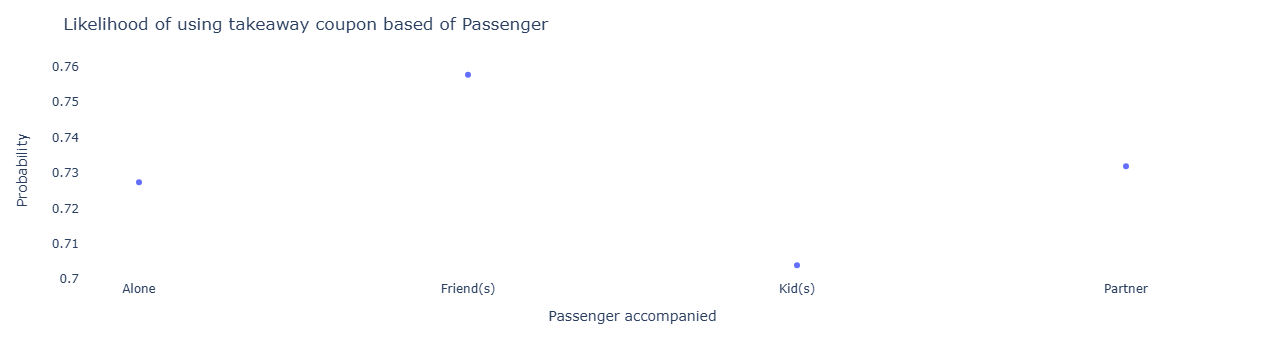

In [68]:
fig=px.scatter(data3.groupby('passanger')['Y'].mean(),y='Y')
fig.update_layout(
    plot_bgcolor='white',
    paper_bgcolor='white',
    title="Likelihood of using takeaway coupon based of Passenger",
    xaxis_title='Passenger accompanied',
    yaxis_title='Probability'
)
fig.show()
fig.write_html('visuals/m5_15_t_prob_passenger.html')

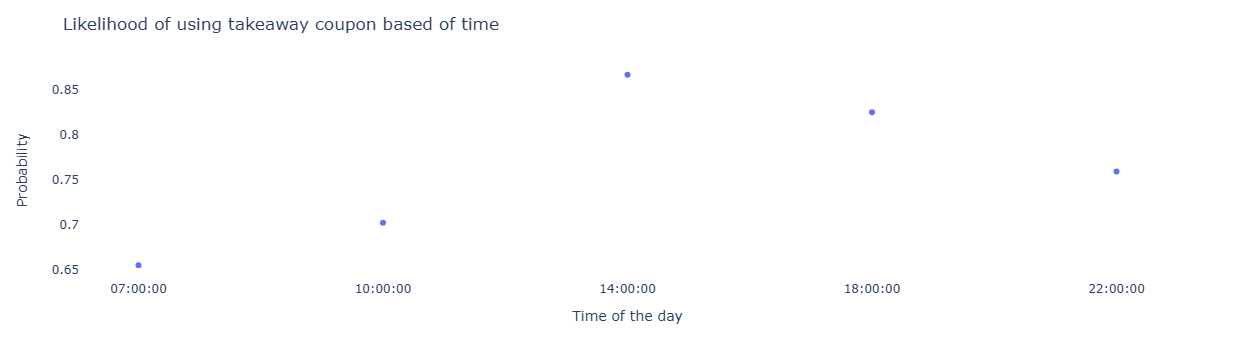

In [69]:
fig=px.scatter(data3.groupby('time')['Y'].mean(),y='Y')
fig.update_layout(
    plot_bgcolor='white',
    paper_bgcolor='white',
    title="Likelihood of using takeaway coupon based of time",
    xaxis_title='Time of the day',
    yaxis_title='Probability'
)
fig.show()
fig.write_html('visuals/m5_16_t_prob_time_of_the_day.html')

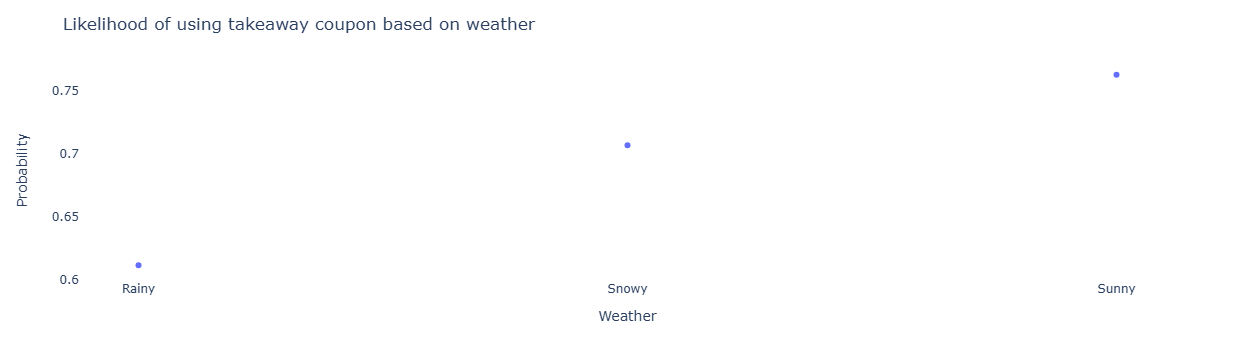

In [70]:
fig=px.scatter(data3.groupby('weather')['Y'].mean(),y='Y')
fig.update_layout(
    plot_bgcolor='white',
    paper_bgcolor='white',
    title="Likelihood of using takeaway coupon based on weather",
    xaxis_title='Weather',
    yaxis_title='Probability'
)
fig.show()
fig.write_html('visuals/m5_17_t_prob_weather.html')

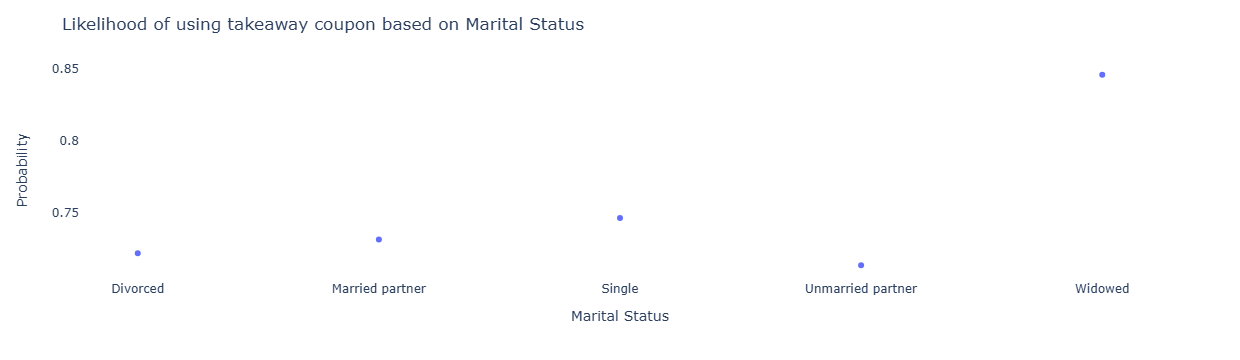

In [71]:
fig=px.scatter(data3.groupby('maritalStatus')['Y'].mean(),y='Y')
fig.update_layout(
    plot_bgcolor='white',
    paper_bgcolor='white',
    title="Likelihood of using takeaway coupon based on Marital Status",
    xaxis_title='Marital Status',
    yaxis_title='Probability'
)
fig.show()
fig.write_html('visuals/m5_18_t_prob_marital_status.html')

In [ ]:
#RestaurantLessThan20

In [76]:
data['RestaurantLessThan20'].value_counts()

RestaurantLessThan20
1~3      5376
4~8      3580
less1    2093
gt8      1285
never     350
Name: count, dtype: int64

In [77]:
data['coupon'].value_counts()

coupon
Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: count, dtype: int64

In [78]:
data4=data.query("coupon=='Restaurant(<20)'")

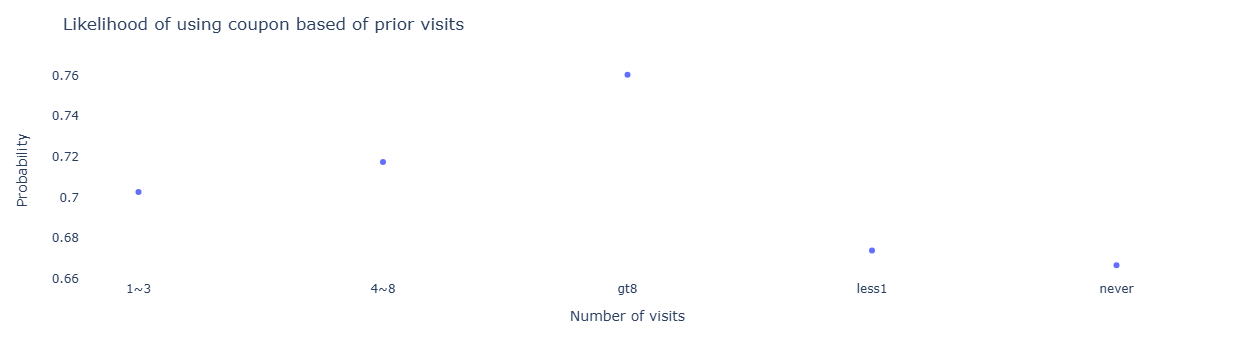

In [79]:
fig=px.scatter(data4.groupby('RestaurantLessThan20')['Y'].mean(),y='Y')
fig.update_layout(
    plot_bgcolor='white',
    paper_bgcolor='white',
    title="Likelihood of using coupon based of prior visits",
    xaxis_title='Number of visits',
    yaxis_title='Probability'
)
fig.show()
fig.write_html('visuals/m5_19_r_prob_visits.html')

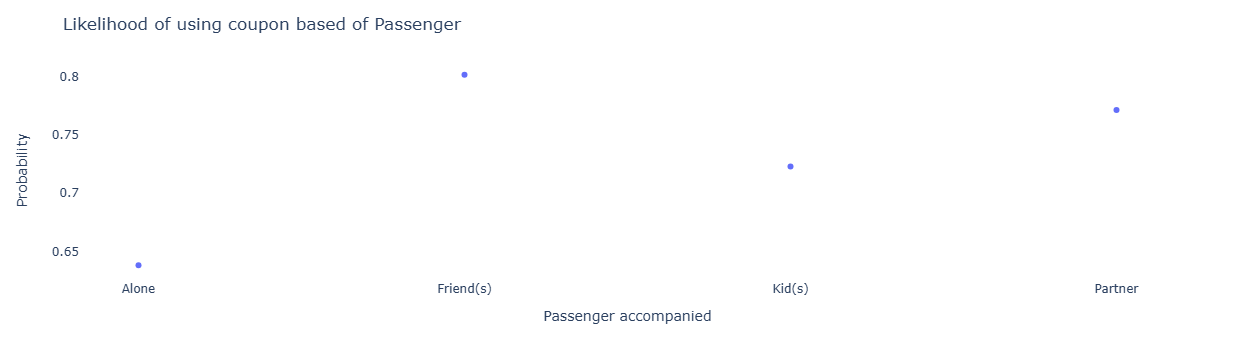

In [80]:
fig=px.scatter(data4.groupby('passanger')['Y'].mean(),y='Y')
fig.update_layout(
    plot_bgcolor='white',
    paper_bgcolor='white',
    title="Likelihood of using coupon based of Passenger",
    xaxis_title='Passenger accompanied',
    yaxis_title='Probability'
)
fig.show()
fig.write_html('visuals/m5_20_r_prob_passenger.html')

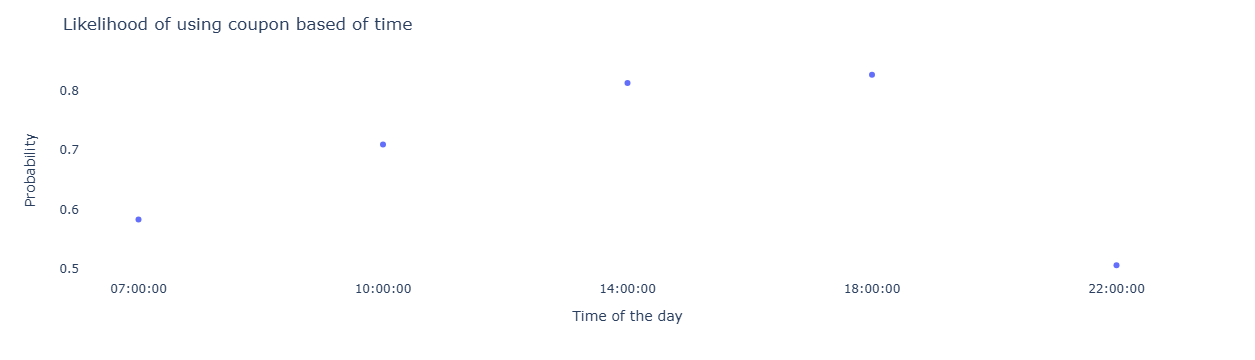

In [81]:
fig=px.scatter(data4.groupby('time')['Y'].mean(),y='Y')
fig.update_layout(
    plot_bgcolor='white',
    paper_bgcolor='white',
    title="Likelihood of using coupon based of time",
    xaxis_title='Time of the day',
    yaxis_title='Probability'
)
fig.show()
fig.write_html('visuals/m5_21_r_prob_time_of_the_day.html')

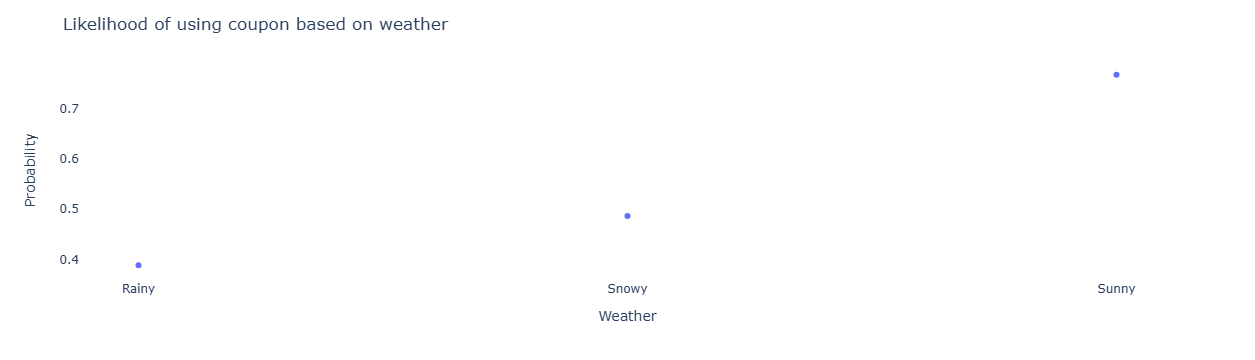

In [82]:
fig=px.scatter(data4.groupby('weather')['Y'].mean(),y='Y')
fig.update_layout(
    plot_bgcolor='white',
    paper_bgcolor='white',
    title="Likelihood of using coupon based on weather",
    xaxis_title='Weather',
    yaxis_title='Probability'
)
fig.show()
fig.write_html('visuals/m5_22_r_prob_weather.html')

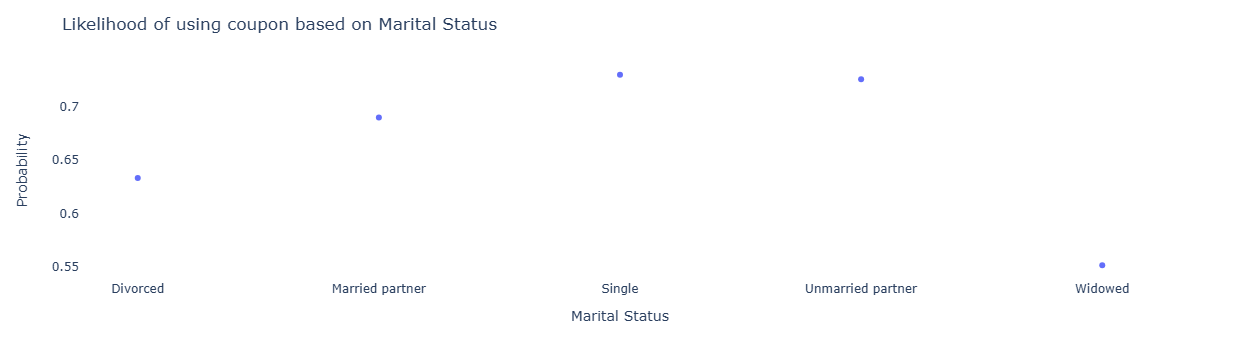

In [83]:
fig=px.scatter(data4.groupby('maritalStatus')['Y'].mean(),y='Y')
fig.update_layout(
    plot_bgcolor='white',
    paper_bgcolor='white',
    title="Likelihood of using coupon based on Marital Status",
    xaxis_title='Marital Status',
    yaxis_title='Probability'
)
fig.show()
fig.write_html('visuals/m5_23_r_prob_marital_status.html')

In [98]:
#Restaurant20To50

In [84]:
data['Restaurant20To50'].value_counts()

Restaurant20To50
less1    6077
1~3      3290
never    2325
4~8       728
gt8       264
Name: count, dtype: int64

In [85]:
data['coupon'].value_counts()

coupon
Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: count, dtype: int64

In [86]:
data5=data.query("coupon=='Restaurant(20-50)'")

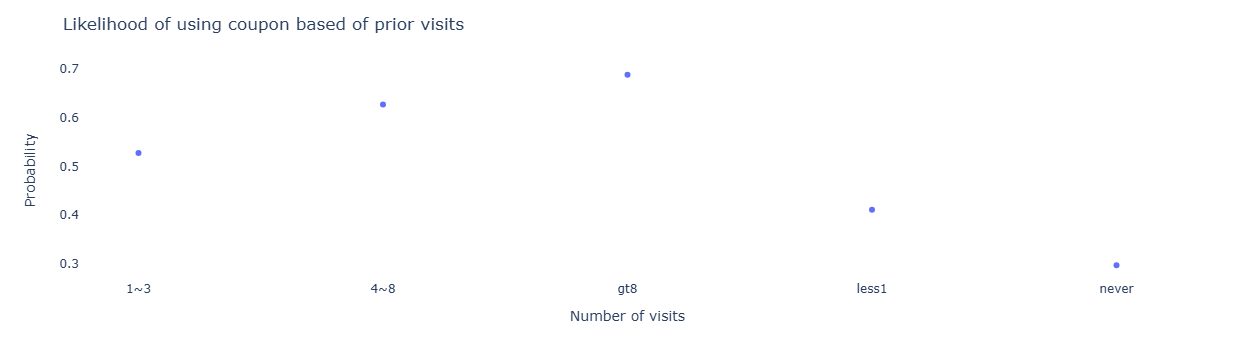

In [87]:
fig=px.scatter(data5.groupby('Restaurant20To50')['Y'].mean(),y='Y')
fig.update_layout(
    plot_bgcolor='white',
    paper_bgcolor='white',
    title="Likelihood of using coupon based of prior visits",
    xaxis_title='Number of visits',
    yaxis_title='Probability'
)
fig.show()
fig.write_html('visuals/m5_24_rh_prob_visits.html')

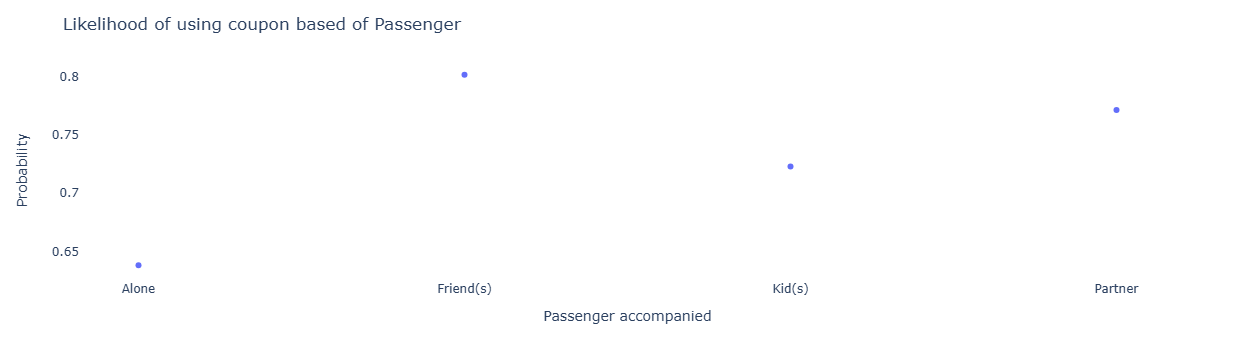

In [80]:
fig=px.scatter(data5.groupby('passanger')['Y'].mean(),y='Y')
fig.update_layout(
    plot_bgcolor='white',
    paper_bgcolor='white',
    title="Likelihood of using coupon based of Passenger",
    xaxis_title='Passenger accompanied',
    yaxis_title='Probability'
)
fig.show()
fig.write_html('visuals/m5_25_rh_prob_passenger.html')

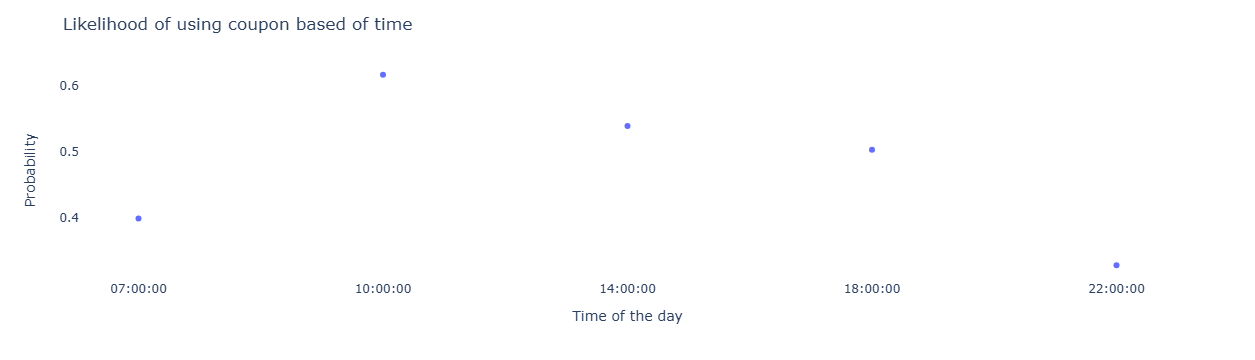

In [88]:
fig=px.scatter(data5.groupby('time')['Y'].mean(),y='Y')
fig.update_layout(
    plot_bgcolor='white',
    paper_bgcolor='white',
    title="Likelihood of using coupon based of time",
    xaxis_title='Time of the day',
    yaxis_title='Probability'
)
fig.show()
fig.write_html('visuals/m5_26_rh_prob_time_of_the_day.html')

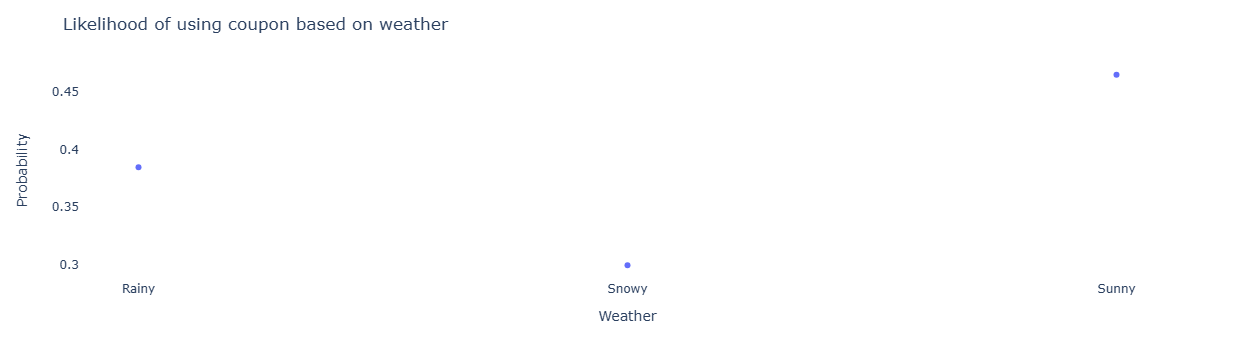

In [89]:
fig=px.scatter(data5.groupby('weather')['Y'].mean(),y='Y')
fig.update_layout(
    plot_bgcolor='white',
    paper_bgcolor='white',
    title="Likelihood of using coupon based on weather",
    xaxis_title='Weather',
    yaxis_title='Probability'
)
fig.show()
fig.write_html('visuals/m5_27_rh_prob_weather.html')

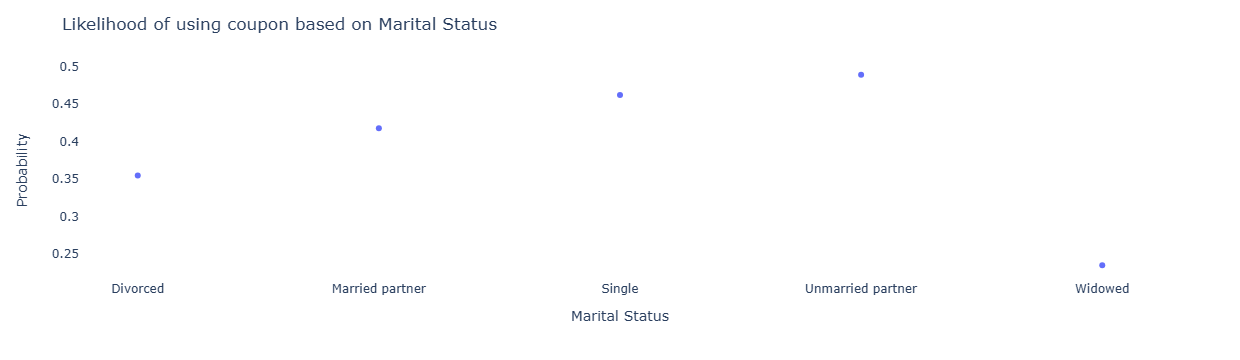

In [90]:
fig=px.scatter(data5.groupby('maritalStatus')['Y'].mean(),y='Y')
fig.update_layout(
    plot_bgcolor='white',
    paper_bgcolor='white',
    title="Likelihood of using coupon based on Marital Status",
    xaxis_title='Marital Status',
    yaxis_title='Probability'
)
fig.show()
fig.write_html('visuals/m5_28_rh_prob_marital_status.html')